#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold,cross_validate, GridSearchCV


#Loading dataset

In [ ]:
data = pd.read_csv("/content/ccdefault (1).csv", index_col ='ID')
X = data.drop("DEFAULT", axis = 1)
y = data["DEFAULT"]

#RANDOM FOREST

In [ ]:
hyperparameters = {'n_estimators' : [10, 20, 30, 40, 50, 80, 100]}
clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, hyperparameters, cv =10, scoring = 'accuracy', return_train_score=True)
grid_search.fit(X, y)


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 80, 100]},
             return_train_score=True, scoring='accuracy')

In [ ]:
res = grid_search.cv_results_
output = pd.DataFrame({'Number of Parameters' : res['params'], 'Training Accuracy': res['mean_train_score'], 'Testing Accuracy': res['mean_test_score'], 'Time Consumption' : res['mean_score_time']})
display(output)

,Number of Parameters,Training Accuracy,Testing Accuracy,Time Consumption
0,{'n_estimators': 10},0.979741,0.805800,0.012303
1,{'n_estimators': 20},0.992696,0.811667,0.021051
2,{'n_estimators': 30},0.996644,0.813700,0.029762
3,{'n_estimators': 40},0.998159,0.815000,0.043726
4,{'n_estimators': 50},0.998789,0.814967,0.045256
5,{'n_estimators': 80},0.999256,0.815633,0.071289
6,{'n_estimators': 100},0.999322,0.816067,0.093121


a) What is the relationship between n_estimators, in-sample CV accuracy and computation time?

As the number of estimators increase in-sample accuracy increases whereas computation time decreases.

In [ ]:
res

{'mean_fit_time': array([0.8216054 , 1.6476176 , 2.48786774, 3.31120527, 4.13537807,
        6.71894677, 8.57908077]),
 'std_fit_time': array([0.06350643, 0.12299804, 0.15915184, 0.20548215, 0.19016525,
        0.22260714, 0.36418236]),
 'mean_score_time': array([0.01230297, 0.0210511 , 0.0297621 , 0.04372628, 0.04525585,
        0.07128906, 0.09312084]),
 'std_score_time': array([0.00250375, 0.00215001, 0.00323955, 0.01852927, 0.00378395,
        0.00663254, 0.00882097]),
 'param_n_estimators': masked_array(data=[10, 20, 30, 40, 50, 80, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 20},
  {'n_estimators': 30},
  {'n_estimators': 40},
  {'n_estimators': 50},
  {'n_estimators': 80},
  {'n_estimators': 100}],
 'split0_test_score': array([0.8       , 0.798     , 0.80666667, 0.80666667, 0.80366667,
        0.80566667, 0.80833333]),
 'split1_test_score': arr

In [ ]:
best_number_of_parameters = grid_search.best_params_
print(best_number_of_parameters)

{'n_estimators': 100}


b) What is the optimal number of estimators for your forest? 

As per the results the best number of estimator is 100.

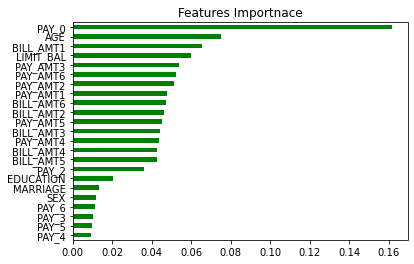

In [ ]:
n_est = list(grid_search.best_params_.values())[0]
reg = RandomForestRegressor(n_estimators = n_est)
reg.fit(X,y)
importance = pd.Series(data = reg.feature_importances_, index =X.columns)

importance= importance.sort_values()

importance.plot(kind = 'barh', color='green')
plt.title('Features Importnace')
plt.show()

c) Which features contribute the most importance in your model according to scikit-learn 
function?  

PAY 0 is the most important feature in my model.


d) What is feature importance and how is it calculated?  (If you are not sure, refer to the Scikit-
Learn.org documentation.) 

Feature importance is a method used to tell us which features are most predictive of the target variable. Feature importance is computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.


#Signing

Name : Ananya Singh

NetID : as133

I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.